In [1]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
dataset = pd.read_excel('/Users/eupirate/Documents/DA_L7_CCT/WK3_25_Sep_1_Oct/Exercise_1_Descriptive_Stats.xlsx')

In [3]:
dataset.head()

,Customer ID,Entity,Name,Surname,Age,Y,Gender,Country,State,Purpose,Satisfaction,Mortgage,Source
0,C0028,Individual,Madalyn,Mercer,19.0,1986.0,F,USA,California,Home,5,No,Website
1,C0027,Individual,Lara,Carrillo,22.0,1983.0,F,USA,California,Home,5,No,Website
2,C0112,Individual,Donavan,Flowers,22.0,1985.0,M,USA,California,Home,1,Yes,Client
3,C0160,Individual,Darien,Dorsey,22.0,1985.0,M,USA,California,Investment,3,Yes,Website
4,C0014,Individual,Alessandra,Perry,25.0,1979.0,F,USA,California,Home,4,No,Agency


In [4]:
dataset.describe()

,Age,Y,Satisfaction
count,178.000000,178.000000,195.000000
mean,46.151685,1960.325843,3.605128
std,12.841692,12.835575,1.363355
min,19.000000,1931.000000,1.000000
25%,37.000000,1950.250000,3.000000
50%,45.000000,1962.000000,4.000000
75%,55.000000,1969.750000,5.000000
max,76.000000,1986.000000,5.000000


In [5]:
#missing values
dataset.isnull().values.any()

True

In [6]:
dataset.isnull().sum()

Customer ID      0
Entity           0
Name             0
Surname          0
Age             17
Y               17
Gender          17
Country          0
State           14
Purpose          0
Satisfaction     0
Mortgage         0
Source           0
dtype: int64

In [7]:
#VS std/Mean * 100 = 26.9%

In [8]:
dataset.Country.value_counts()

USA        177
Canada       7
Russia       4
UK           2
Belgium      2
Denmark      1
Germany      1
Mexico       1
Name: Country, dtype: int64

In [9]:
dataset.State.value_counts()

California    119
Nevada         17
Arizona        11
Oregon         11
Colorado       11
Utah            6
Virginia        4
Kansas          1
Wyoming         1
Name: State, dtype: int64

In [10]:
#We count the values
value_counts = dataset['Country'].value_counts()
relative_frequencies = value_counts / len(dataset)

In [11]:
#We create the subtable to find the relative frequency (%)

table = pd.DataFrame({'Country': value_counts.index, 
                         'Frequency': value_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
table

,Country,Frequency,Relative Frequency
0,USA,177,0.907692
1,Canada,7,0.035897
2,Russia,4,0.020513
3,UK,2,0.010256
4,Belgium,2,0.010256
5,Denmark,1,0.005128
6,Germany,1,0.005128
7,Mexico,1,0.005128


In [12]:
#We count the values
value_counts = dataset['State'].value_counts()
relative_frequencies = value_counts / len(dataset)

In [13]:
#We create the subtable to find the relative frequency (%)

subtable = pd.DataFrame({'State': value_counts.index, 
                         'Frequency': value_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

,State,Frequency,Relative Frequency
0,California,119,0.610256
1,Nevada,17,0.087179
2,Arizona,11,0.056410
3,Oregon,11,0.056410
4,Colorado,11,0.056410
5,Utah,6,0.030769
6,Virginia,4,0.020513
7,Kansas,1,0.005128
8,Wyoming,1,0.005128


In [14]:
mean_adm= dataset['Age'].mean()
print(mean_adm)

46.151685393258425


In [15]:
median = dataset['Age'].median()
print(median)

45.0


In [16]:
mode = dataset['Age'].mode()
print(mode)

0    48.0
Name: Age, dtype: float64


[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Customers'),
 Text(0.5, 1.0, 'Age Histogram')]

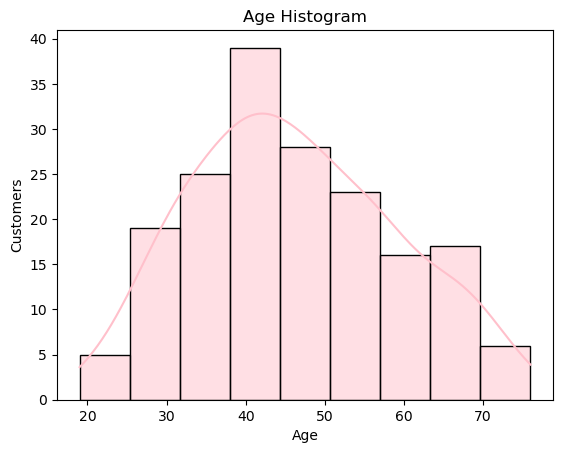

In [17]:
ax = sns.histplot(dataset.Age,kde=True,color = 'pink')
ax.set(xlabel='Age', ylabel='Customers', title ='Age Histogram')

[Text(0.5, 0, 'Satisfaction Level'),
 Text(0, 0.5, 'Customers'),
 Text(0.5, 1.0, 'Satisfaction Level')]

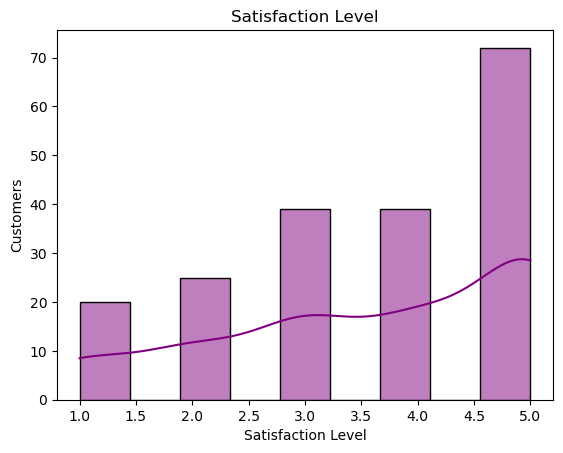

In [18]:
ax = sns.histplot(dataset.Satisfaction,kde=True,color = 'purple')
ax.set(xlabel='Satisfaction Level', ylabel='Customers', title ='Satisfaction Level')

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Companies'),
 Text(0.5, 1.0, 'Age Histogram')]

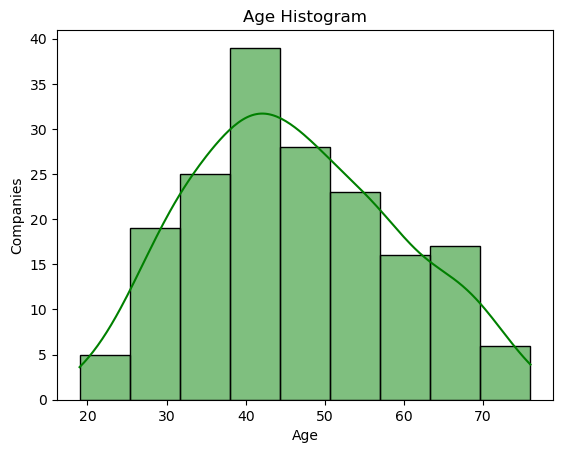

In [19]:
ax = sns.histplot(dataset.Age, kde=True, color ='green')
ax.set(xlabel='Age', ylabel='Companies', title ='Age Histogram')

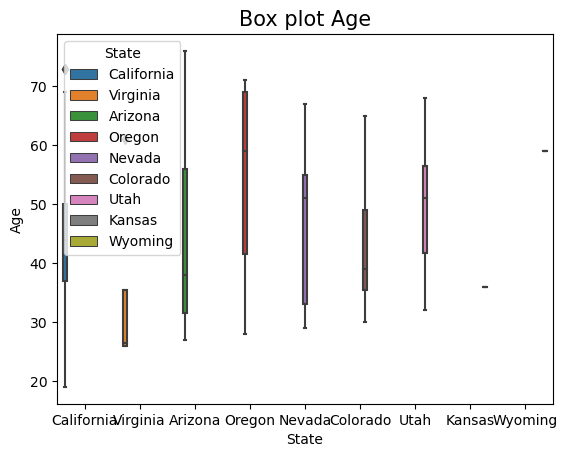

In [20]:
sns.boxplot(x = 'State', y ='Age', data=dataset, hue = 'State')
plt.title('Box plot Age', fontsize=15)
#plt.legend([], [], frameon=False)
plt.show()

In [21]:
data_locations = dataset.groupby('State', axis = 0).sum()
data_locations


/var/folders/zn/1r2fyj917_n2qngrf527q0rr0000gn/T/ipykernel_8162/528015009.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_locations = dataset.groupby('State', axis = 0).sum()


,Age,Y,Satisfaction
State,,,
Arizona,499.0,21575.0,39
California,4752.0,207930.0,453
Colorado,468.0,21607.0,35
Kansas,36.0,1971.0,3
Nevada,597.0,25488.0,50
Oregon,605.0,21467.0,34
Utah,299.0,11737.0,17
Virginia,140.0,7884.0,18
Wyoming,59.0,1948.0,3


ValueError: 'label' must be of length 'x'

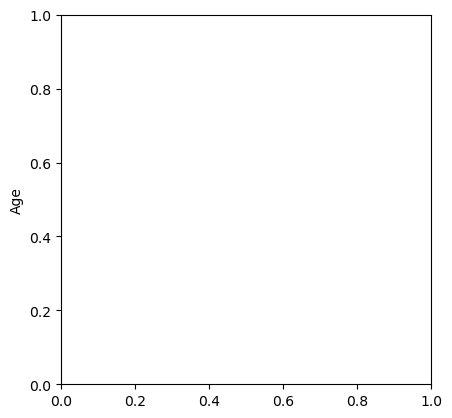

In [22]:
locations = ['California', 'Florida', 'New York']
data_locations['Age'].plot(kind='pie', labels = locations, radius=1, autopct='%1.1f%%', shadow = True)
plt.title('Age spent by location')
plt.ylabel("")
plt.tight_layout()

In [23]:
data_locations.reset_index(inplace=True)

In [24]:
#rename columns
data_locations.columns = ['State', 'R&D Spend', 'Age', 'Marketing Spend', 'Profit']

ValueError: Length mismatch: Expected axis has 4 elements, new values have 5 elements

In [ ]:
data_locations

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="State", y="Age", data=data_locations)